# 0. Importing the Dataset

In [581]:
from kagglehub import datasets
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = datasets.dataset_load(KaggleDatasetAdapter.PANDAS, "arslanali4343/real-estate-dataset", "data.csv")

# 1. Initial Analysis

In [582]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [584]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [585]:
df["CHAS"].unique()

array([0, 1])

In [586]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Observations
<b>CHAS</b> column is binary and encoded. <br>
<b>RAD</b> column is ordinal and encoded.  <br>
<b>RM</b> column has multiple null values.

# 2. Data Preprocessing

## Null Values

In [587]:
df = df.fillna(df.mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# 3. Data Visualisation After Preprocessing

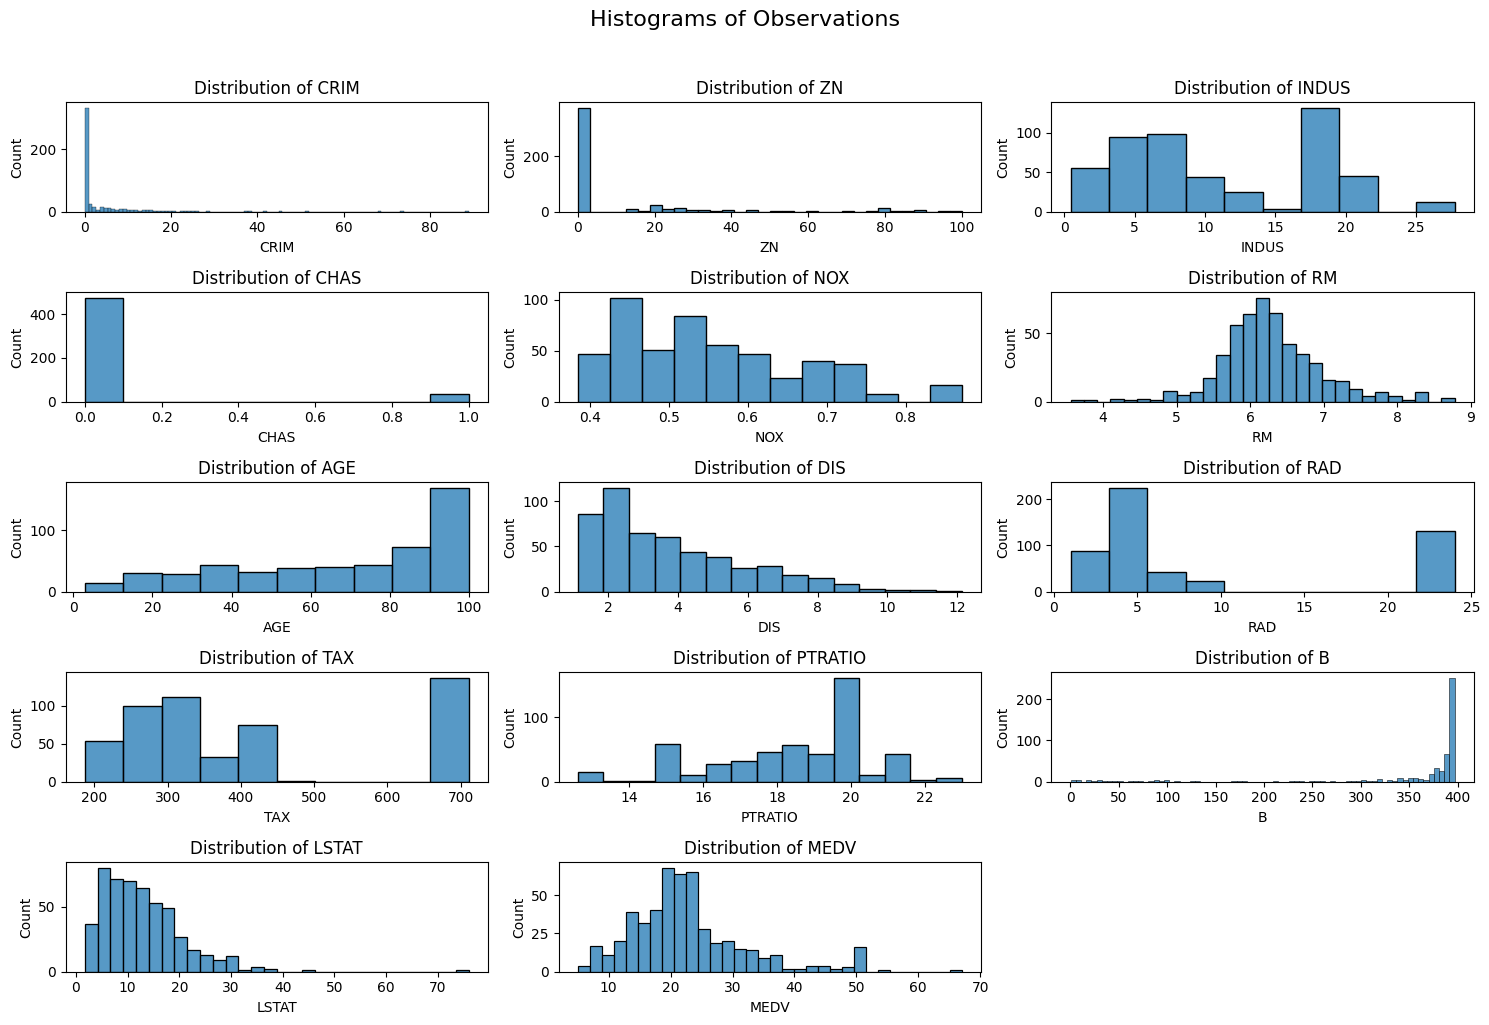

In [588]:
plt.figure(figsize=(15, 10))

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_cols)
rows = (num_plots + 2) // 3

for i, col in enumerate(num_cols):
    plt.subplot(rows, 3, i+1)
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.suptitle('Histograms of Observations', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

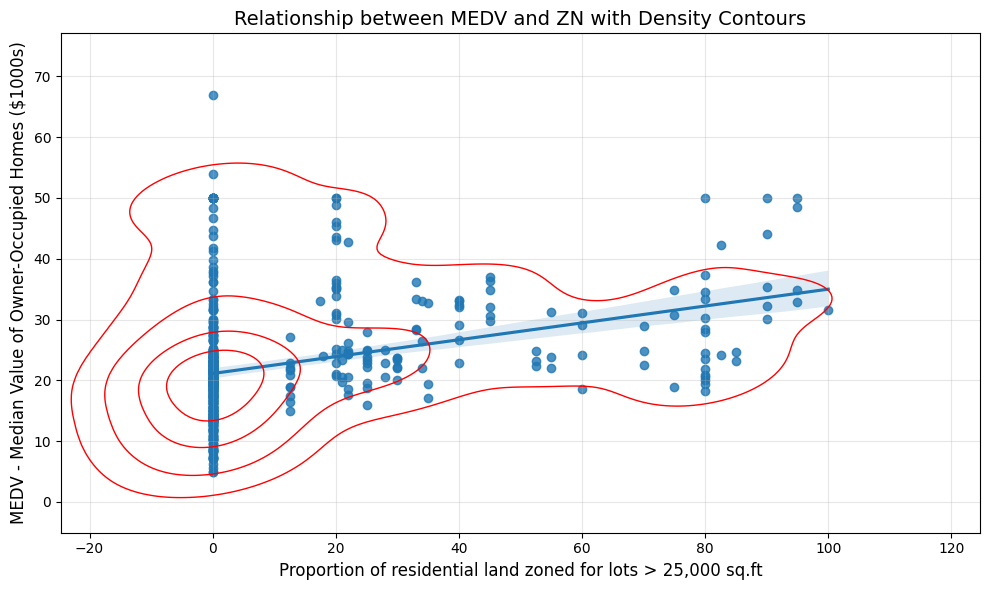

In [589]:
plt.figure(figsize=(10, 6))
# Scatterplot
sns.regplot(x='ZN', y='MEDV', data=df)

# KDE contours
sns.kdeplot(x='ZN', y='MEDV', data=df, levels=5, color='r', linewidths=1)
plt.title('Relationship between MEDV and ZN with Density Contours', fontsize=14)
plt.xlabel('Proportion of residential land zoned for lots > 25,000 sq.ft', fontsize=12)
plt.ylabel('MEDV - Median Value of Owner-Occupied Homes ($1000s)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

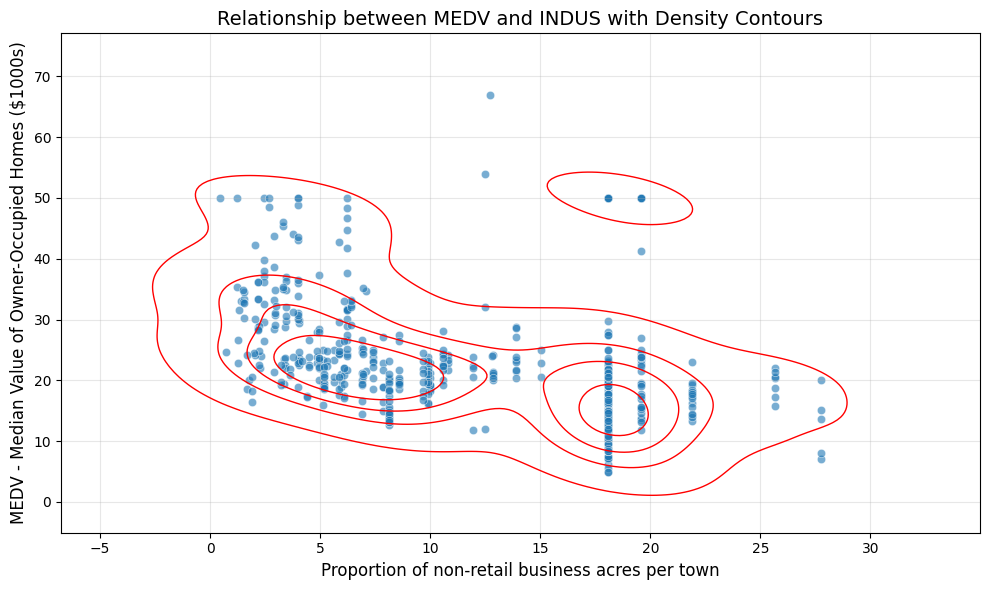

In [590]:
plt.figure(figsize=(10, 6))
# Scatterplot
sns.scatterplot(x='INDUS', y='MEDV', data=df, alpha=0.6)

# KDE contours
sns.kdeplot(x='INDUS', y='MEDV', data=df, levels=5, color='r', linewidths=1)
plt.title('Relationship between MEDV and INDUS with Density Contours', fontsize=14)
plt.xlabel('Proportion of non-retail business acres per town', fontsize=12)
plt.ylabel('MEDV - Median Value of Owner-Occupied Homes ($1000s)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [591]:
correlations = df.corr()['MEDV'].sort_values(ascending=False)
print(correlations)

MEDV       1.000000
RM         0.666954
ZN         0.339767
B          0.317941
DIS        0.233469
CHAS       0.164782
AGE       -0.368203
RAD       -0.379016
CRIM      -0.380072
NOX       -0.411486
PTRATIO   -0.447464
TAX       -0.459274
INDUS     -0.463269
LSTAT     -0.562960
Name: MEDV, dtype: float64


## Observations

<b>MEDV vs ZN</b> presents obscure patterns by indicating high density near origin and regression line <u>suggesting positive correlation</u>.<br>
<b>MEDV vs INDUS</b> presents <u>strong negative correlation</u>, suggesting <b>higher MEDV in low INDUS areas </b>.

# 4. Training & Model

## Train-Test Split

In [592]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

# 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Confirm the split worked correctly
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (408, 13)
Training target shape: (408,)
Testing features shape: (103, 13)
Testing target shape: (103,)


## Model Preparation

### Linear Regression

In [593]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept = True, copy_X = True, n_jobs = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.4f}")


Linear Regression - MSE: 86.42, R²: 0.1993


### XGBoost

In [594]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0,
    subsample=0.7,
    colsample_bytree=0.7,
    eval_metric="rmse",
    tree_method="auto"
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.4f}")

XGBoost - MSE: 28.14, R²: 0.7392


## Plotting Results

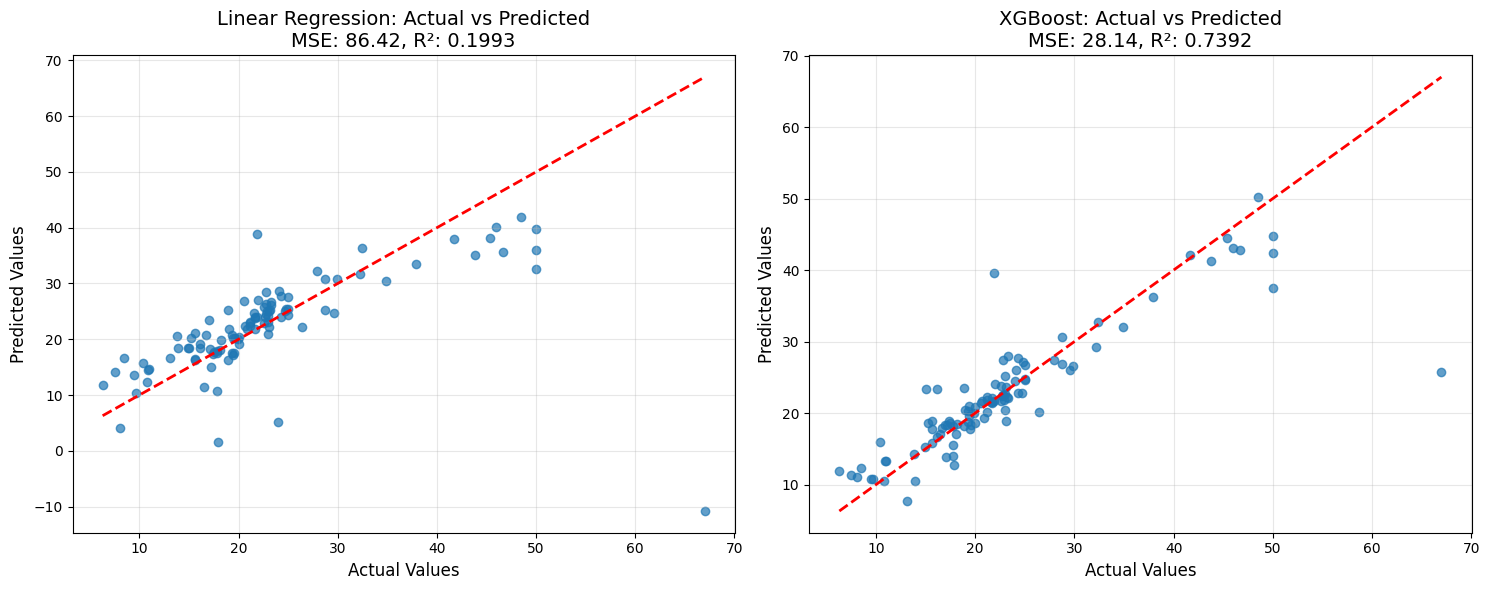

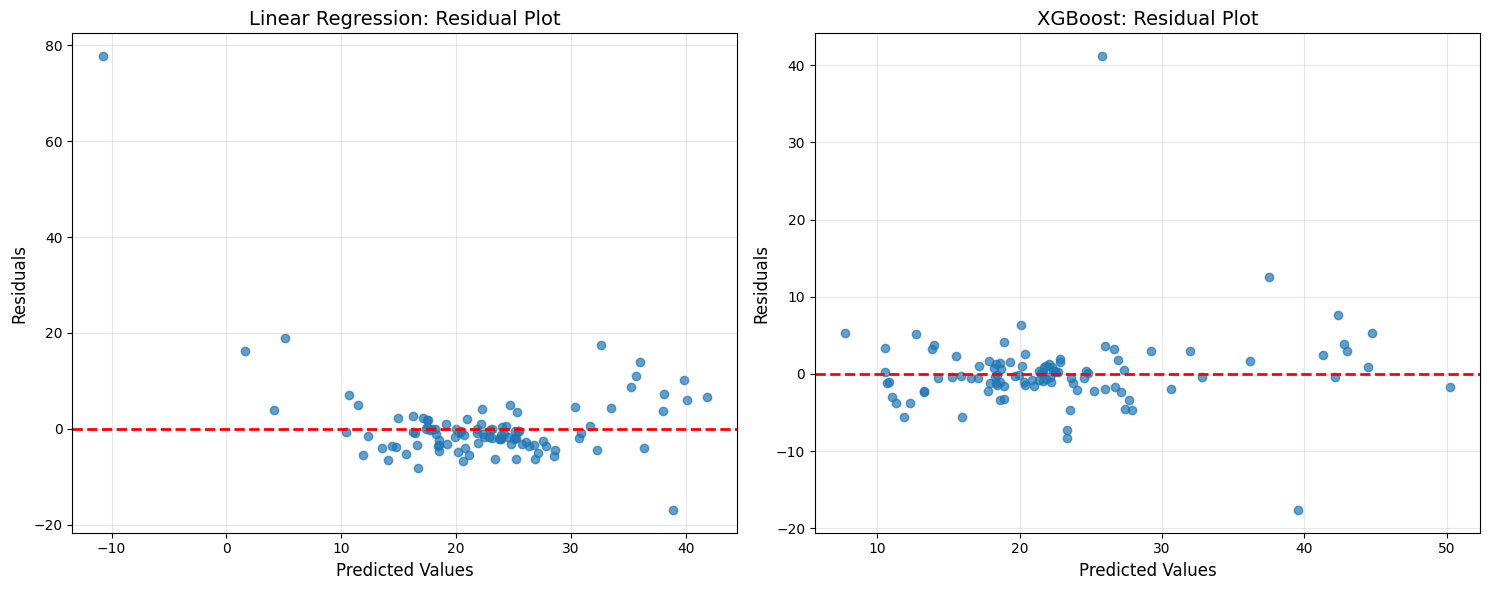

In [595]:
plt.figure(figsize=(15, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'Linear Regression: Actual vs Predicted\nMSE: {mse:.2f}, R²: {r2:.4f}', fontsize=14)
plt.grid(True, alpha=0.3)

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'XGBoost: Actual vs Predicted\nMSE: {xgb_mse:.2f}, R²: {xgb_r2:.4f}', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residuals
plt.figure(figsize=(15, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Linear Regression: Residual Plot', fontsize=14)
plt.grid(True, alpha=0.3)

# XGBoost Residuals
plt.subplot(1, 2, 2)
xgb_residuals = y_test - xgb_pred
plt.scatter(xgb_pred, xgb_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('XGBoost: Residual Plot', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Importance

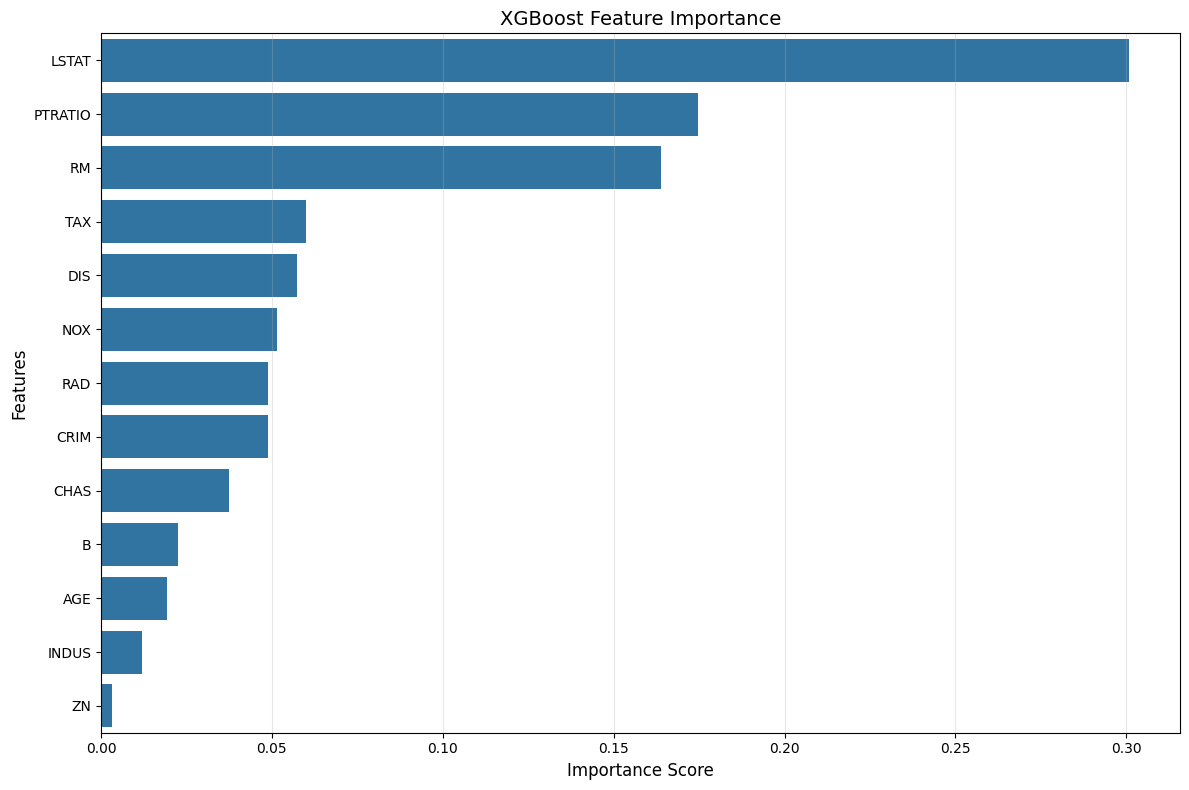

Feature Importance Ranking:
LSTAT     : 0.3007
PTRATIO   : 0.1746
RM        : 0.1639
TAX       : 0.0598
DIS       : 0.0573
NOX       : 0.0516
RAD       : 0.0488
CRIM      : 0.0487
CHAS      : 0.0375
B         : 0.0225
AGE       : 0.0193
INDUS     : 0.0121
ZN        : 0.0032


In [596]:
# Feature importances from XGBoost model
importance = xgb_model.feature_importances_
feature_names = X.columns

# Create df
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
for i, row in importance_df.iterrows():
    print(f"{row['Feature']:<10}: {row['Importance']:.4f}")

## Observations

<b>CHAS</b>, <b>ZN</b>, <b>RAD</b>, <b>B</b>, <b>AGE</b> are insignificant in the model, can be removed for optimisation.

# 5. Further Optimisation of the Dataset

## Train-Test Split

In [597]:
df_optimized = df.drop(['CHAS', 'ZN', 'RAD', 'B', 'AGE'], axis=1)

X_opt = df_optimized.drop('MEDV', axis=1)
y_opt = df_optimized['MEDV']

In [598]:
# Train-test split
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.2)

## Model Preparation

### Linear Regression

In [599]:
# Train Linear Regression on optimized features
model_opt = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
model_opt.fit(X_train_opt, y_train_opt)
y_pred_opt = model_opt.predict(X_test_opt)

# Evaluate Linear Regression performance
mse_opt = mean_squared_error(y_test_opt, y_pred_opt)
r2_opt = r2_score(y_test_opt, y_pred_opt)
print(f"Optimized Linear Regression - MSE: {mse_opt:.2f}, R²: {r2_opt:.4f}")

Optimized Linear Regression - MSE: 36.14, R²: 0.5987


### XGBoost

In [600]:
# Train XGBoost on optimized features
xgb_model_opt = XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0,
    subsample=0.7,
    colsample_bytree=0.7,
    eval_metric="rmse",
    tree_method="auto"
)

xgb_model_opt.fit(X_train_opt, y_train_opt)
xgb_pred_opt = xgb_model_opt.predict(X_test_opt)

# Evaluate XGBoost performance
xgb_mse_opt = mean_squared_error(y_test_opt, xgb_pred_opt)
xgb_r2_opt = r2_score(y_test_opt, xgb_pred_opt)
print(f"Optimized XGBoost - MSE: {xgb_mse_opt:.2f}, R²: {xgb_r2_opt:.4f}")

Optimized XGBoost - MSE: 23.90, R²: 0.7346


## Comparison

In [601]:
# Compare optimized vs original model performance
print("\nPerformance Comparison:")
print(f"Linear Regression - Original MSE: {mse:.2f}, Optimized MSE: {mse_opt:.2f}")
print(f"XGBoost - Original MSE: {xgb_mse:.2f}, Optimized MSE: {xgb_mse_opt:.2f}")
print(f"Linear Regression - Original R²: {r2:.4f}, Optimized R²: {r2_opt:.4f}")
print(f"XGBoost - Original R²: {xgb_r2:.4f}, Optimized R²: {xgb_r2_opt:.4f}")


Performance Comparison:
Linear Regression - Original MSE: 86.42, Optimized MSE: 36.14
XGBoost - Original MSE: 28.14, Optimized MSE: 23.90
Linear Regression - Original R²: 0.1993, Optimized R²: 0.5987
XGBoost - Original R²: 0.7392, Optimized R²: 0.7346


## Observations

Removing the insignificant features significantly reduced MSE of both models.

# 5.1 Hyperparameter Tuning

In [602]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 1.0]
}

grid_search = GridSearchCV(XGBRegressor(tree_method='auto', eval_metric='rmse'), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train_opt, y_train_opt)

# Best
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation MSE: {-grid_search.best_score_:.2f}")

Fitting 5 folds for each of 11520 candidates, totalling 57600 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.6}
Best cross-validation MSE: 14.49


In [603]:
# Train with best params
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train_opt, y_train_opt)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'rmse'


In [604]:
# Evaluate on test set
best_pred = best_xgb.predict(X_test_opt)
best_mse = mean_squared_error(y_test_opt, best_pred)
best_r2 = r2_score(y_test_opt, best_pred)
print(f"Tuned XGBoost - MSE: {best_mse:.2f}, R²: {best_r2:.4f}")

Tuned XGBoost - MSE: 20.40, R²: 0.7735


In [605]:
# Compare to previous results
print("\nFinal Performance Comparison:")
print(f"Original XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.4f}")
print(f"Optimized XGBoost - MSE: {xgb_mse_opt:.2f}, R²: {xgb_r2_opt:.4f}")
print(f"Tuned XGBoost - MSE: {best_mse:.2f}, R²: {best_r2:.4f}")


Final Performance Comparison:
Original XGBoost - MSE: 28.14, R²: 0.7392
Optimized XGBoost - MSE: 23.90, R²: 0.7346
Tuned XGBoost - MSE: 20.40, R²: 0.7735
